# Start

Preparing the dataframe

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import cv2

In [2]:
images=[cv2.imread(file) for file in glob('vehicle-detection/vehicles/*.png')]

In [3]:
images=np.array(images)

In [4]:
images.shape

(8792, 64, 64, 3)

In [5]:
image=[]
for i in range(0,8792):
    img=images[i].flatten()
    image.append(img)
image=np.array(image)

In [6]:
feat_cols=['pixel'+str(i) for i in range(image.shape[1])]
df=pd.DataFrame(image,columns=feat_cols)

In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel12278,pixel12279,pixel12280,pixel12281,pixel12282,pixel12283,pixel12284,pixel12285,pixel12286,pixel12287
0,42,36,34,42,35,33,40,33,33,34,...,255,255,255,255,255,255,255,255,255,255
1,92,79,73,91,78,71,89,76,67,86,...,201,169,177,203,190,187,204,196,190,205
2,255,255,255,255,255,255,255,255,255,255,...,139,128,126,135,125,136,135,122,135,156
3,27,40,40,20,32,44,21,29,57,31,...,130,126,125,137,122,129,131,128,138,131
4,111,91,69,80,60,35,96,76,59,60,...,82,105,93,91,87,84,89,88,89,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,68,69,68,68,69,67,68,70,66,69,...,73,76,82,73,76,82,73,77,83,74
8788,103,123,108,80,97,86,76,93,82,85,...,42,51,56,49,73,78,69,78,83,74
8789,52,68,57,62,77,62,74,91,74,110,...,38,40,43,36,39,42,34,39,43,32
8790,94,93,92,94,94,92,92,92,89,85,...,77,79,86,78,80,87,79,79,87,79


In [8]:
64*64*3

12288

In [9]:
df[feat_cols].values.shape

(8792, 12288)

# FACTOR ANALYSIS

In [10]:
from sklearn.decomposition import FactorAnalysis
FA=FactorAnalysis(n_components=3).fit_transform(df[feat_cols].values)

In [11]:
FA

array([[ 1.54528281, -1.40279015,  0.48392589],
       [-0.28303971, -0.85017316, -0.1197324 ],
       [ 0.52188215, -0.78873763, -0.31907773],
       ...,
       [-0.16839326,  0.54376075,  0.43951689],
       [-0.01956216,  0.76841159,  0.24984484],
       [-0.10639746,  0.65541007,  0.29565415]])

In [12]:
FA.size

26376

In [13]:
FA.shape

(8792, 3)

In [14]:
FA[:,0]

array([ 1.54528281, -0.28303971,  0.52188215, ..., -0.16839326,
       -0.01956216, -0.10639746])

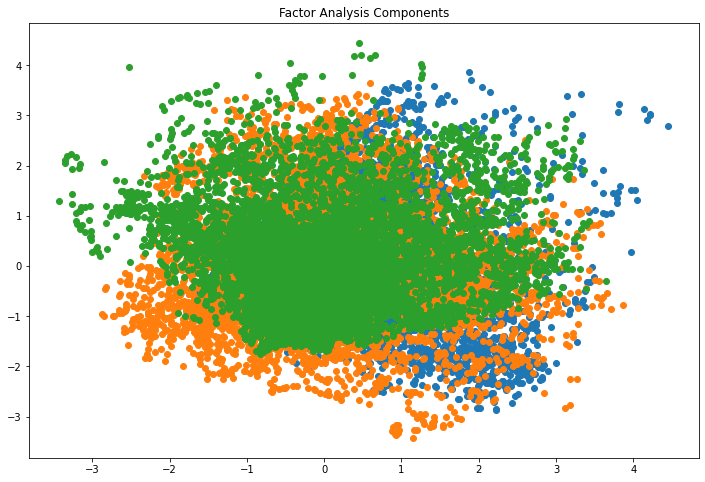

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0],FA[:,1])
plt.scatter(FA[:,1],FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

# Principal component analysis

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_result=pca.fit_transform(df[feat_cols].values)

In [17]:
pca_result

array([[ 2132.23431186,  4404.22232327,  -998.95750173, -1897.40481885],
       [-2186.73231552,  1728.04232508,   -33.11646145,   112.9656285 ],
       [   46.03528995,  1945.89972724,   557.93852253,  -529.14259391],
       ...,
       [  809.80469606, -1332.13453368,  -661.26459104,   651.78414704],
       [ 1466.19046229, -1392.10779597,  -192.03319887,  -116.06507095],
       [ 1074.09347593, -1431.48010521,  -355.34200291,   695.75503926]])

In [18]:
pca_result.shape

(8792, 4)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

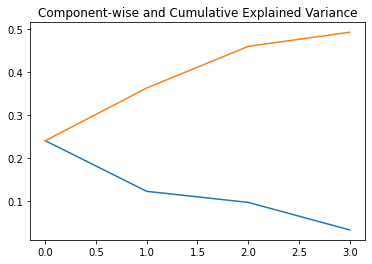

In [19]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

# Isomap reduction

In [20]:
from sklearn import manifold
trans_data=manifold.Isomap(n_neighbors=5,n_components=3,n_jobs=1).fit_transform(df[feat_cols][:6000].values)

c:\users\l\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive

In [21]:
trans_data

array([[-12367.45973463,  -9505.17352644,  -2989.38348451],
       [   156.3551047 ,  -7707.05411592,   1496.79709839],
       [ -5504.49215124, -26028.88725513,  14828.17777767],
       ...,
       [ -7675.59834983,  20413.27001118,    238.81766953],
       [ -9492.3710844 ,  10444.44974838,  -5812.95097755],
       [ -7909.93898461,   8745.55715741,  -4238.63704655]])

In [22]:
trans_data.shape

(6000, 3)

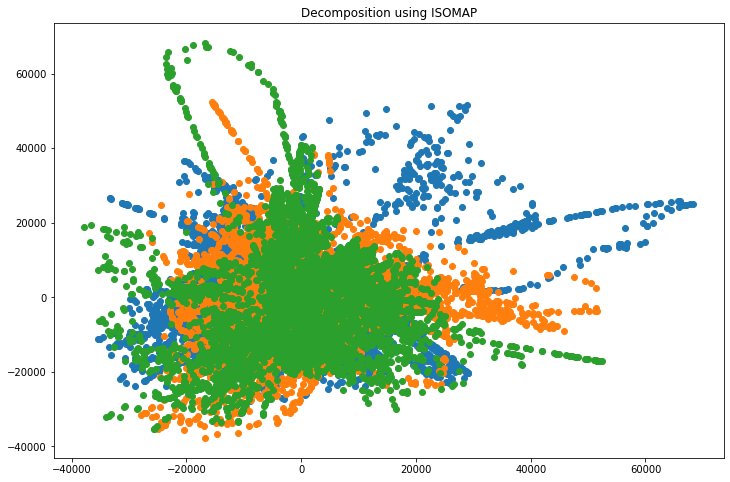

In [23]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

# t- Distributed Stochastic Neighbor Embedding

In [24]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=3,n_iter=300).fit_transform(df[feat_cols][:6000].values)

c:\users\l\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [25]:
tsne

array([[-6.0287356 ,  0.13330202, -2.625422  ],
       [-2.542618  , -3.1391265 ,  1.1673903 ],
       [-0.29354513,  3.5513053 , -2.517606  ],
       ...,
       [ 2.9227083 ,  4.3184175 , -0.9008826 ],
       [ 0.9771334 ,  0.9658141 , -2.9904025 ],
       [ 0.6042289 ,  0.28094065, -2.5329854 ]], dtype=float32)

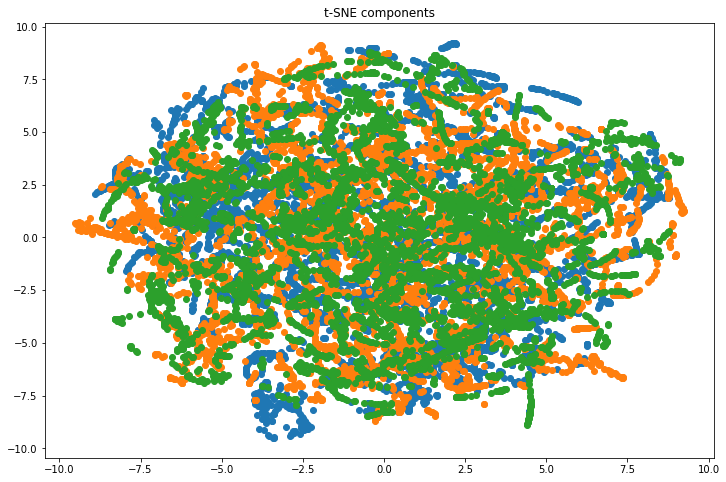

In [26]:
plt.figure(figsize=(12,8))
plt.title("t-SNE components")
plt.scatter(tsne[:,0],tsne[:,1])
plt.scatter(tsne[:,1],tsne[:,2])
plt.scatter(tsne[:,2],tsne[:,0])